<a href="https://colab.research.google.com/github/Henrique-soliveira/github-slideshow/blob/Henrique-soliveira-patch-1/An%C3%A1lise_de_imagem_aula3_2%C2%B0semestre.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Exemplos Análise de Imagens

## Módulos

In [1]:
!sudo apt install tesseract-ocr

Reading package lists... Done
Building dependency tree       
Reading state information... Done
tesseract-ocr is already the newest version (4.00~git2288-10f4998a-2).
The following package was automatically installed and is no longer required:
  libnvidia-common-460
Use 'sudo apt autoremove' to remove it.
0 upgraded, 0 newly installed, 0 to remove and 20 not upgraded.


In [2]:
! sudo apt-get install tesseract-ocr-por

Reading package lists... Done
Building dependency tree       
Reading state information... Done
tesseract-ocr-por is already the newest version (4.00~git24-0e00fe6-1.2).
The following package was automatically installed and is no longer required:
  libnvidia-common-460
Use 'sudo apt autoremove' to remove it.
0 upgraded, 0 newly installed, 0 to remove and 20 not upgraded.


In [3]:
! tesseract --list-langs

List of available languages (3):
osd
por
eng


In [4]:
! tesseract --version

tesseract 4.0.0-beta.1
 leptonica-1.75.3
  libgif 5.1.4 : libjpeg 8d (libjpeg-turbo 1.5.2) : libpng 1.6.34 : libtiff 4.0.9 : zlib 1.2.11 : libwebp 0.6.1 : libopenjp2 2.3.0

 Found AVX2
 Found AVX
 Found SSE


In [5]:
! sudo pip install pytesseract

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [7]:
import pytesseract as pt
import cv2
from PIL import Image
import imutils

## Carregar imagens

In [8]:
imagem = np.array(Image.open('scarllet.jpg'))

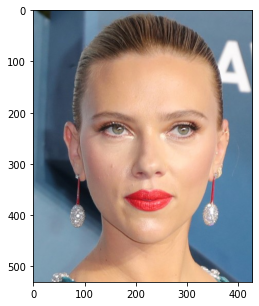

In [9]:
plt.figure(figsize = (5,5))
plt.imshow(imagem)
#plt.axis("off")

In [10]:
imagem.shape

(531, 428, 3)

- Propriedades

In [12]:
# Tamanho 
imagem.size, 531*428*3

(681804, 681804)

In [14]:
imagem[:, :, 0]

array([[107, 101,  93, ..., 112, 112, 112],
       [111, 105,  99, ..., 111, 111, 111],
       [111, 106, 103, ..., 111, 111, 111],
       ...,
       [126, 126, 126, ...,  72,  72,  72],
       [125, 125, 125, ...,  72,  72,  72],
       [125, 125, 124, ...,  72,  72,  72]], dtype=uint8)

In [15]:
imagem[:, :, 1]

array([[132, 126, 120, ..., 139, 139, 139],
       [136, 130, 126, ..., 138, 138, 138],
       [138, 133, 130, ..., 138, 138, 138],
       ...,
       [159, 159, 159, ..., 121, 121, 121],
       [158, 158, 158, ..., 121, 121, 121],
       [158, 158, 157, ..., 121, 121, 121]], dtype=uint8)

In [16]:
imagem[:, :, 2]

array([[152, 146, 137, ..., 160, 160, 160],
       [156, 150, 145, ..., 159, 159, 159],
       [159, 152, 149, ..., 159, 159, 159],
       ...,
       [178, 178, 178, ..., 162, 162, 162],
       [177, 177, 177, ..., 162, 162, 162],
       [177, 177, 176, ..., 162, 162, 162]], dtype=uint8)

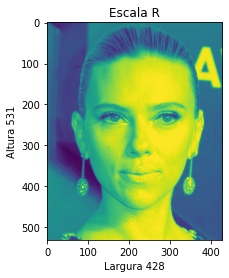

In [17]:
# Escala R
plt.title('Escala R') 
plt.ylabel('Altura {}'.format(imagem.shape[0])) 
plt.xlabel('Largura {}'.format(imagem.shape[1])) 
plt.imshow(imagem[ : , : , 0])
#plt.axis("off")
#plt.show()

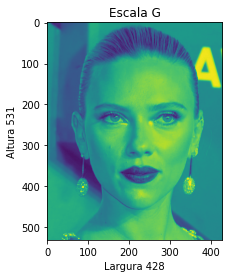

In [18]:
# Escala R
plt.title('Escala G') 
plt.ylabel('Altura {}'.format(imagem.shape[0])) 
plt.xlabel('Largura {}'.format(imagem.shape[1])) 
plt.imshow(imagem[ : , : , 1])
#plt.axis("off")
#plt.show()

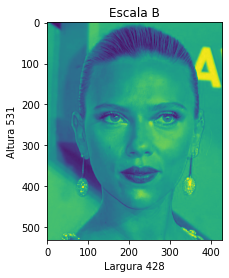

In [19]:
# Escala R
plt.title('Escala B') 
plt.ylabel('Altura {}'.format(imagem.shape[0])) 
plt.xlabel('Largura {}'.format(imagem.shape[1])) 
plt.imshow(imagem[ : , : , 2])
#plt.axis("off")
#plt.show()

## Aplicações em OCR

- Carregar imagem

In [21]:
img_ocr = cv2.imread('IMG_OCR.jpg')

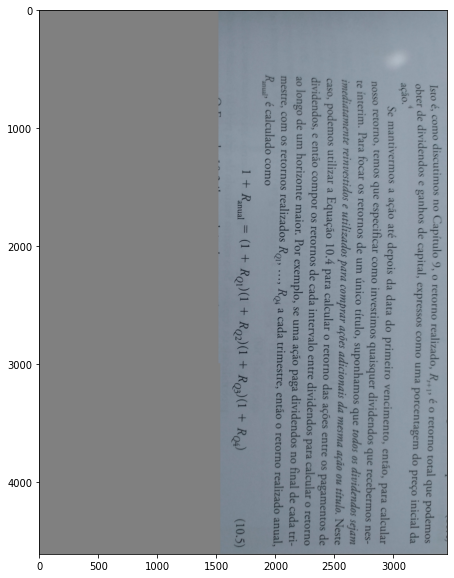

In [22]:
plt.figure(figsize=(20,10))
plt.imshow(img_ocr)

- Girar imagem

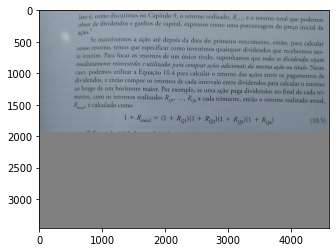

In [23]:
angulo = -90
img_rotated = imutils.rotate_bound(img_ocr, angle = angulo)
plt.imshow(img_rotated)
plt.show()

- Transformar em texto

In [24]:
text = str(pt.image_to_string(img_rotated, lang='por', config='--psm 6'))

In [25]:
text

'obter de dividendos e ganhos de capital, expressos como uma porcentagem do preço inicial da\nação.\n\n"Se mantivermos a ação até depois da data do primeiro vencimento, então, para calcular\nnosso retorno, temos que especificar como investimos quaisquer dividendos que recebermos nes-\nte ínterim. Para focar os retornos de um único título, suponhamos que todos os dividendos sejam\nimediatamente reinvestidos e utilizados para comprar ações adicionais da mesma ação ou título. Neste\ncaso, podemos utilizar a Equação 10.4 para calcular o retorno das ações entre os pagamentos de\ndividendos, e então compor os retornos de cada intervalo entre dividendos para calcular o retorno\n\nao longo de um horizonte maior. Por exemplo, se uma ação paga dividendos no final de cada tri-\nmestre, com os retornos realizados Rg, ..., Roy à cada trimestre, então o retorno realizado anual,\nR ua é calculado como\nL+ he Rod do Ro) + Ro + Ros) (10.5)\nAm Dodi a ámes :\n\x0c'

In [26]:
with open('texto_ocr.txt', 'w') as f:
    f.write(text)

In [27]:
## VAI CAIR NO CP!